In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('../HTRU2/HTRU_2.csv', sep = ',', engine = 'python')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
5,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
6,119.484375,48.765059,0.031460,-0.112168,0.999164,9.279612,19.206230,479.756567,0
7,130.382812,39.844056,-0.158323,0.389540,1.220736,14.378941,13.539456,198.236457,0
8,107.250000,52.627078,0.452688,0.170347,2.331940,14.486853,9.001004,107.972506,0
9,107.257812,39.496488,0.465882,1.162877,4.079431,24.980418,7.397080,57.784738,0


In [5]:
print(data)

       Profile_mean  Profile_stdev  Profile_skewness  Profile_kurtosis  \
0        140.562500      55.683782         -0.234571         -0.699648   
1        102.507812      58.882430          0.465318         -0.515088   
2        103.015625      39.341649          0.323328          1.051164   
3        136.750000      57.178449         -0.068415         -0.636238   
4         88.726562      40.672225          0.600866          1.123492   
5         93.570312      46.698114          0.531905          0.416721   
6        119.484375      48.765059          0.031460         -0.112168   
7        130.382812      39.844056         -0.158323          0.389540   
8        107.250000      52.627078          0.452688          0.170347   
9        107.257812      39.496488          0.465882          1.162877   
10       142.078125      45.288073         -0.320328          0.283953   
11       133.257812      44.058244         -0.081060          0.115362   
12       134.960938      49.554327    

In [6]:
data.head()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [7]:
data.tail()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0
17897,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


**Attribute information**

Numeric values:
* Profile_mean — Mean of the integrated profile
* Profile_stdev — Standard deviation of the integrated profile
* Profile_skewness — Excess kurtosis of the integrated profile
* Profile_kurtosis — Skewness of the integrated profile
* DM_mean — Mean of the DM-SNR curve
* DM_stdev — Standard deviation of the DM-SNR curve
* DM_skewness — Excess kurtosis of the DM-SNR curve
* DM_kurtosis — Skewness of the DM-SNR curve

{0, 1} values:
* class — Class

**Source:** Dr Robert Lyon, University of Manchester, School of Physics and Astronomy, Alan Turing Building, Manchester M13 9PL, United Kingdom

**Prediction task:** predict if a Neutron star is Pulsar or not by 8 numeric attributes values

In [8]:
print(data.shape)
print(data.columns)

(17898, 9)
Index([u'Profile_mean', u'Profile_stdev', u'Profile_skewness',
       u'Profile_kurtosis', u'DM_mean', u'DM_stdev', u'DM_skewness',
       u'DM_kurtosis', u'class'],
      dtype='object')


In [9]:
data.index

RangeIndex(start=0, stop=17898, step=1)

In [10]:
data.at[4, 'DM_mean']

1.178929766

In [11]:
data['DM_mean']

0          3.199833
1          1.677258
2          3.121237
3          3.642977
4          1.178930
5          1.636288
6          0.999164
7          1.220736
8          2.331940
9          4.079431
10         5.376254
11         1.632107
12        10.696488
13         2.836120
14         6.330268
15         2.738294
16         1.508361
17         2.841137
18         9.342809
19        27.555184
20         3.883779
21         3.551839
22         1.832776
23         6.018395
24         2.436455
25         8.281773
26         2.646321
27         2.365385
28         2.107023
29         1.489130
            ...    
17868      1.744147
17869      7.561037
17870     14.379599
17871      2.012542
17872      1.139632
17873      1.450669
17874      2.294314
17875      2.091973
17876    149.843646
17877      1.041806
17878      5.354515
17879      6.290970
17880      2.316054
17881      1.529264
17882      1.159699
17883      1.336120
17884      3.079431
17885      0.982441
17886      0.853679


In [12]:
data['DM_mean'][2]

3.121237458

In [13]:
data['DM_mean'].dtype.name

'float64'

In [14]:
type(data['DM_mean'][2])

numpy.float64

In [15]:
type(data['DM_mean'])

pandas.core.series.Series

In [17]:
data[['DM_mean', 'DM_kurtosis']].head()

,DM_mean,DM_kurtosis
0,3.199833,74.242225
1,1.677258,127.393580
2,3.121237,63.171909
3,3.642977,53.593661
4,1.178930,252.567306


In [18]:
data.describe()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


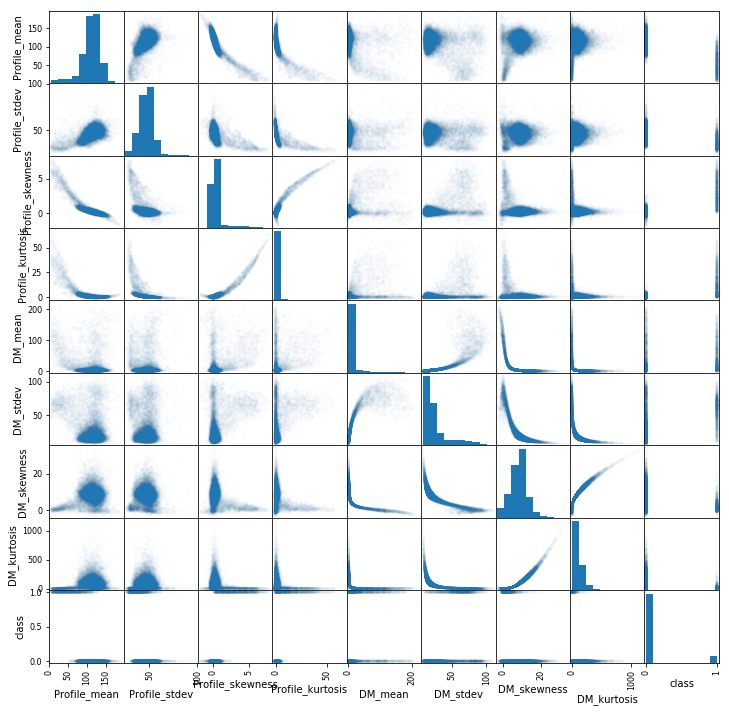

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (12, 12))
pass

In [28]:
data.corr()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
Profile_mean,1.000000,0.547137,-0.873898,-0.738775,-0.298841,-0.307016,0.234331,0.144033,-0.673181
Profile_stdev,0.547137,1.000000,-0.521435,-0.539793,0.006869,-0.047632,0.029429,0.027691,-0.363708
Profile_skewness,-0.873898,-0.521435,1.000000,0.945729,0.414368,0.432880,-0.341209,-0.214491,0.791591
Profile_kurtosis,-0.738775,-0.539793,0.945729,1.000000,0.412056,0.415140,-0.328843,-0.204782,0.709528
DM_mean,-0.298841,0.006869,0.414368,0.412056,1.000000,0.796555,-0.615971,-0.354269,0.400876
DM_stdev,-0.307016,-0.047632,0.432880,0.415140,0.796555,1.000000,-0.809786,-0.575800,0.491535
DM_skewness,0.234331,0.029429,-0.341209,-0.328843,-0.615971,-0.809786,1.000000,0.923743,-0.390816
DM_kurtosis,0.144033,0.027691,-0.214491,-0.204782,-0.354269,-0.575800,0.923743,1.000000,-0.259117
class,-0.673181,-0.363708,0.791591,0.709528,0.400876,0.491535,-0.390816,-0.259117,1.000000


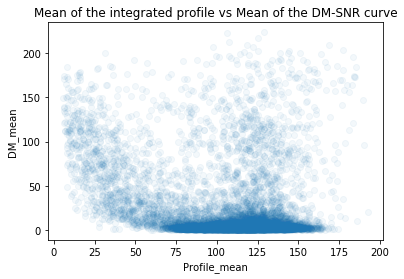

In [29]:
plt.plot(data['Profile_mean'], data['DM_mean'], 'o', alpha = 0.05)
plt.xlabel('Profile_mean')
plt.ylabel('DM_mean')
plt.title('Mean of the integrated profile vs Mean of the DM-SNR curve')
pass

In [30]:
data['class'] == 1

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19        True
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
17868    False
17869    False
17870    False
17871    False
17872    False
17873    False
17874    False
17875    False
17876     True
17877    False
17878    False
17879    False
17880    False
17881    False
17882    False
17883    False
17884    False
17885    False
17886    False
17887    False
17888    False
17889    False
17890    False
17891    False
17892    False
17893    False
17894    False
17895    False
17896    False
17897    False
Name: class, Length: 17898, dtype: bool

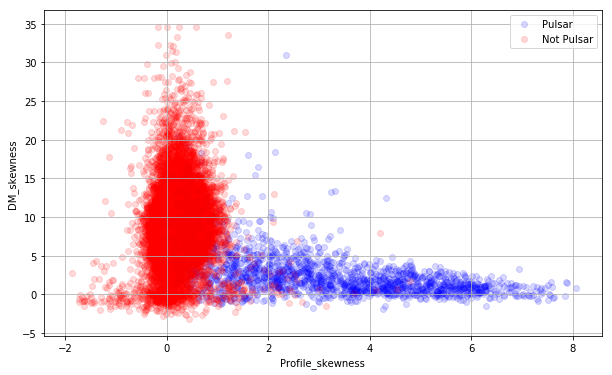

In [38]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['class'] == 1]['Profile_skewness'],
            data[data['class'] == 1]['DM_skewness'],
            alpha = 0.15,
            label = 'Pulsar',
            color = 'b')

plt.scatter(data[data['class'] == 0]['Profile_skewness'],
            data[data['class'] == 0]['DM_skewness'],
            alpha = 0.15,
            label = 'Not Pulsar',
            color = 'r')

plt.xlabel('Profile_skewness')
plt.ylabel('DM_skewness')
plt.legend()
plt.grid()

In [ ]:
for name in data['Profile_mean'].equal:
    print(name, data['education-num'][data['education'] == name].iloc[0])